# Chapter 06 
 Machine Learning for Business Analytics<br>
Concepts, Techniques, and Applications in Python<br>
by Galit Shmueli, Peter C. Bruce, Peter Gedeck, Nitin R. Patel

Publisher: Wiley; 2nd edition (2024) <br>
<!-- ISBN-13: 978-3031075650 -->

(c) 2024 Galit Shmueli, Peter C. Bruce, Peter Gedeck, Nitin R. Patel

The code needs to be executed in sequence.

Python packages and Python itself change over time. This can cause warnings or errors.
"Warnings" are for information only and can usually be ignored.
"Errors" will stop execution and need to be fixed in order to get results.

If you come across an issue with the code, please follow these steps

- Check the repository (https://gedeck.github.io/sdsa-code-solutions/) to see if the code has been upgraded. This might solve the problem.
- Report the problem using the issue tracker at https://github.com/gedeck/sdsa-code-solutions/issues
- Paste the error message into Google and see if someone else already found a solution

In [23]:
import matplotlib.pyplot as plt
import mlba
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
from mlxtend.feature_selection import ExhaustiveFeatureSelector, SequentialFeatureSelector
from sklearn.linear_model import BayesianRidge, Lasso, LassoCV, LinearRegression, Ridge, RidgeCV
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [24]:
# reduce data frame to the top 1000 rows and select columns for regression analysis
car_df = mlba.load_data('ToyotaCorolla.csv')
car_df = car_df.iloc[0:1000]

predictors = ['Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Met_Color', 'Automatic', 'CC',
              'Doors', 'Quarterly_Tax', 'Weight']
outcome = 'Price'

# partition data
X = pd.get_dummies(car_df[predictors], drop_first=True)
y = car_df[outcome]
train_X, holdout_X, train_y, holdout_y = train_test_split(X, y, test_size=0.4,
                                                    random_state=314)

car_lm = LinearRegression()
car_lm.fit(train_X, train_y)

# print coefficients
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': car_lm.coef_}))

# print performance measures (training data)
mlba.regressionSummary(y_true=train_y, y_pred=car_lm.predict(train_X))

           Predictor  coefficient
0          Age_08_04  -130.792830
1                 KM    -0.018302
2                 HP    64.834495
3          Met_Color    54.282338
4          Automatic   298.009711
5                 CC    -4.251357
6              Doors   -25.888900
7      Quarterly_Tax    18.013228
8             Weight    15.547273
9   Fuel_Type_Diesel  3875.777969
10  Fuel_Type_Petrol  2897.532504

Regression statistics

Mean Error (ME) : 0.0000
Root Mean Squared Error (RMSE) : 1340.1580
Mean Absolute Error (MAE) : 987.7296
Mean Percentage Error (MPE) : -0.9911
Mean Absolute Percentage Error (MAPE) : 8.8094


In [25]:
# Use predict() to make predictions on a new set
car_lm_pred = car_lm.predict(holdout_X)

result = pd.DataFrame({'Predicted': car_lm_pred, 'Actual': holdout_y,
                       'Residual': holdout_y - car_lm_pred})
print(result.head(20))

# print performance measures (holdout data)
mlba.regressionSummary(y_true=holdout_y, y_pred=car_lm_pred)

        Predicted  Actual     Residual
764  10073.017338   10950   876.982662
277  12649.704215   11495 -1154.704215
515  10317.854192   10750   432.145808
305  13075.699963   11895 -1180.699963
108  17210.881336   17950   739.118664
392  10627.038857    9950  -677.038857
905   9179.342231    9950   770.657769
507  11015.919573   11500   484.080427
789   9880.554635    8950  -930.554635
260  12124.410668   11950  -174.410668
69   16177.924091   15950  -227.924091
60   16429.726963   14950 -1479.726963
744   7987.909413    7450  -537.909413
584  10731.467539   10500  -231.467539
223  11392.715402   14950  3557.284598
104  19597.277288   19450  -147.277288
335  13441.801213   12500  -941.801213
463  11886.513474    8750 -3136.513474
224  13559.243997   12450 -1109.243997
269  12608.507012   10950 -1658.507012

Regression statistics

Mean Error (ME) : -1.3621
Root Mean Squared Error (RMSE) : 1355.0409
Mean Absolute Error (MAE) : 1028.0884
Mean Percentage Error (MPE) : -1.2047
Mean Absolut

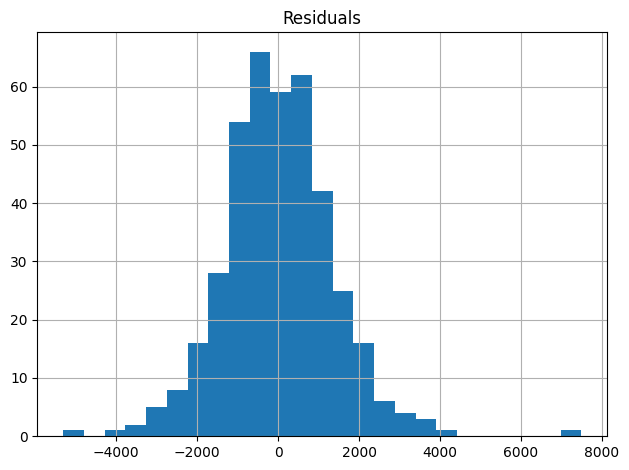

In [26]:
car_lm_pred = car_lm.predict(holdout_X)
all_residuals = holdout_y - car_lm_pred

pd.DataFrame({'Residuals': all_residuals}).hist(bins=25)
plt.tight_layout()
plt.show()

In [27]:
# Determine the percentage of datapoints with a residual
# in [-1406, 1406] = approx. 75\% of the data
print(len(all_residuals[(all_residuals > -1406) & (all_residuals < 1406)]) /
len(all_residuals))

0.7425


In [28]:
from sklearn.model_selection import cross_validate

model = LinearRegression()

scoring = {'neg_RMSE': 'neg_root_mean_squared_error',
           'neg_MAE': 'neg_mean_absolute_error'}
scores = cross_validate(model, train_X, train_y, cv=5, scoring=scoring)

print(f"CV-RMSE = {- scores['test_neg_RMSE'].mean():.2f}")
print(f"CV-MAE = {- scores['test_neg_MAE'].mean():.2f}")

CV-RMSE = 1514.51
CV-MAE = 1052.89


In [29]:
cv_results = {'RMSE': - scores['test_neg_RMSE'].mean(),
              'MAE': - scores['test_neg_MAE'].mean()}

In [30]:
model = LinearRegression()
efs = ExhaustiveFeatureSelector(model,
            min_features=1, max_features=11,
            cv=5, scoring='neg_root_mean_squared_error',
            print_progress=False, n_jobs=4)
efs = efs.fit(train_X, train_y)

print(f'Best score: {- efs.best_score_:.2f}')
print(f'Best subset (indices): {efs.best_idx_}')
print(f'Best subset (corresponding names):\n{efs.best_feature_names_}')

Best score: 1479.38
Best subset (indices): (0, 1, 2, 6, 8)
Best subset (corresponding names):
('Age_08_04', 'KM', 'HP', 'Doors', 'Weight')


In [31]:
cv_exhaustive = {'RMSE': - scores['test_neg_RMSE'].mean(),
                 'MAE': - scores['test_neg_MAE'].mean()}
efs_subset = list(efs.best_feature_names_)

2047
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220,

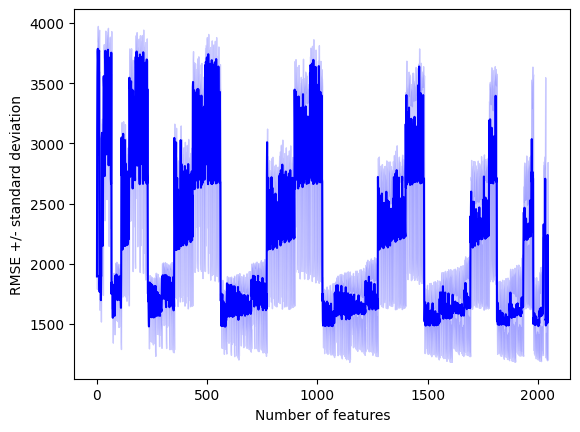

In [32]:
import matplotlib.pyplot as plt

metric_dict = efs.get_metric_dict()
print(len(metric_dict))

k_feat = sorted(metric_dict.keys())
avg = [-metric_dict[k]['avg_score'] for k in k_feat]
print(k_feat)

upper, lower = [], []
for k in k_feat:
    upper.append(-metric_dict[k]['avg_score'] +
                metric_dict[k]['std_dev'])
    lower.append(-metric_dict[k]['avg_score'] -
                metric_dict[k]['std_dev'])

fig, ax = plt.subplots()
ax.fill_between(k_feat, upper, lower, alpha=0.2, color='blue', lw=1)
ax.plot(k_feat, avg, color='blue') #, marker='o')
ax.set_ylabel('RMSE +/- standard deviation')
ax.set_xlabel('Number of features')
feature_min = len(metric_dict[k_feat[0]]['feature_idx'])
feature_max = len(metric_dict[k_feat[-1]]['feature_idx'])
plt.show()
%matplotlib inline

In [33]:
important_features = {}
for v in efs.subsets_.values():
    n = len(v['feature_names'])
    if n not in important_features:  # noqa: SIM114
        important_features[n] = v
    elif v['avg_score'] > important_features[len(v['feature_names'])]['avg_score']:
        important_features[n] = v
for k, v in important_features.items():
    print(f'{k}, RMSE: {- v["avg_score"]:.2f}, Features: {v["feature_names"]}')

1, RMSE: 1895.03, Features: ('Age_08_04',)
2, RMSE: 1697.97, Features: ('Age_08_04', 'Weight')
3, RMSE: 1551.82, Features: ('Age_08_04', 'KM', 'Weight')
4, RMSE: 1479.57, Features: ('Age_08_04', 'KM', 'HP', 'Weight')
5, RMSE: 1479.38, Features: ('Age_08_04', 'KM', 'HP', 'Doors', 'Weight')
6, RMSE: 1482.08, Features: ('Age_08_04', 'KM', 'HP', 'Doors', 'Quarterly_Tax', 'Weight')
7, RMSE: 1486.71, Features: ('Age_08_04', 'KM', 'HP', 'Met_Color', 'Automatic', 'Doors', 'Weight')
8, RMSE: 1485.12, Features: ('Age_08_04', 'KM', 'HP', 'Automatic', 'CC', 'Quarterly_Tax', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol')
9, RMSE: 1482.00, Features: ('Age_08_04', 'KM', 'HP', 'Automatic', 'CC', 'Doors', 'Quarterly_Tax', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol')
10, RMSE: 1487.74, Features: ('Age_08_04', 'KM', 'HP', 'Met_Color', 'Automatic', 'CC', 'Doors', 'Quarterly_Tax', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol')
11, RMSE: 1514.51, Features: ('Age_08_04', 'KM', 'HP', 'Met_Color', 'Automatic', 'CC', 'Doors', 'Qu

In [34]:
sfs_forward = SequentialFeatureSelector(model,
            k_features=(1, 11),
            forward=True, floating=False,
            cv=5, scoring='neg_root_mean_squared_error',
            n_jobs=-1)
sfs_forward = sfs_forward.fit(train_X, train_y)

best_subset = sfs_forward.subsets_[1]
for v in sfs_forward.subsets_.values():
    if v['avg_score'] > best_subset['avg_score']:
        best_subset = v

print(f"Best accuracy score: {- best_subset['avg_score']:.2f}")
print(f"Best subset (indices): {best_subset['feature_idx']}")
print(f"Best subset (corresponding names):\n{best_subset['feature_names']}")

Best accuracy score: 1479.38
Best subset (indices): (0, 1, 2, 6, 8)
Best subset (corresponding names):
('Age_08_04', 'KM', 'HP', 'Doors', 'Weight')


In [35]:
forward_subset = list(best_subset['feature_names'])

In [36]:
sfs_backward = SequentialFeatureSelector(model,
            k_features=(1, 11),
            forward=False, floating=False,
            cv=5, scoring='neg_root_mean_squared_error',
            n_jobs=-1)
sfs_backward = sfs_backward.fit(train_X, train_y)

best_subset = sfs_backward.subsets_[1]
for v in sfs_backward.subsets_.values():
    if v['avg_score'] > best_subset['avg_score']:
        best_subset = v

print(f"Best accuracy score: {- best_subset['avg_score']:.2f}")
print(f"Best subset (indices): {best_subset['feature_idx']}")
print(f"Best subset (corresponding names):\n{best_subset['feature_names']}")

Best accuracy score: 1482.00
Best subset (indices): (0, 1, 2, 4, 5, 6, 7, 9, 10)
Best subset (corresponding names):
('Age_08_04', 'KM', 'HP', 'Automatic', 'CC', 'Doors', 'Quarterly_Tax', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol')


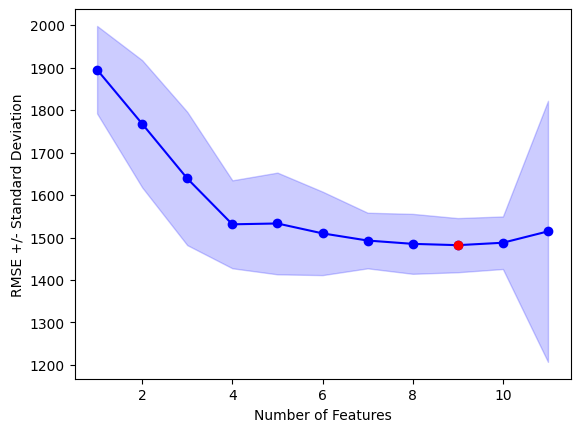

In [37]:
backward_subset = list(best_subset['feature_names'])

metric_dict = sfs_backward.get_metric_dict()

fig = plt.figure()
k_feat = sorted(metric_dict)
avg = [-metric_dict[k]['avg_score'] for k in k_feat]
best_idx = np.argmin(avg)

upper, lower = [], []
for k in k_feat:
    upper.append(-metric_dict[k]['avg_score'] + metric_dict[k]['std_dev'])
    lower.append(-metric_dict[k]['avg_score'] - metric_dict[k]['std_dev'])

plt.fill_between(k_feat, upper, lower, alpha=0.2, color='blue', lw=1)
plt.plot(k_feat, avg, color='blue', marker='o')
plt.plot(k_feat[best_idx], avg[best_idx], color='red', marker='o')
plt.ylabel('RMSE +/- Standard Deviation')
plt.xlabel('Number of Features')
plt.show()

In [38]:
sfs_stepwise = SequentialFeatureSelector(model,
            k_features=(1, 11),
            forward=True, floating=True,
            cv=5, scoring='neg_root_mean_squared_error',
            n_jobs=-1)

sfs_stepwise = sfs_stepwise.fit(train_X, train_y)

best_subset = sfs_stepwise.subsets_[1]
for v in sfs_stepwise.subsets_.values():
    if v['avg_score'] > best_subset['avg_score']:
        best_subset = v

print(f"Best accuracy score: {- best_subset['avg_score']:.2f}")
print(f"Best subset (indices): {best_subset['feature_idx']}")
print(f"Best subset (corresponding names):\n{best_subset['feature_names']}")

Best accuracy score: 1479.38
Best subset (indices): (0, 1, 2, 6, 8)
Best subset (corresponding names):
('Age_08_04', 'KM', 'HP', 'Doors', 'Weight')


In [39]:
stepwise_subset = list(best_subset['feature_names'])
for _, results in sfs_stepwise.subsets_.items():
    print(results['avg_score'], results['feature_names'])

-1895.0266910419311 ('Age_08_04',)
-1697.9737764074848 ('Age_08_04', 'Weight')
-1551.8175978152847 ('Age_08_04', 'KM', 'Weight')
-1479.570193322642 ('Age_08_04', 'KM', 'HP', 'Weight')
-1479.383548239972 ('Age_08_04', 'KM', 'HP', 'Doors', 'Weight')
-1482.0817197199563 ('Age_08_04', 'KM', 'HP', 'Doors', 'Quarterly_Tax', 'Weight')
-1486.7075301998163 ('Age_08_04', 'KM', 'HP', 'Met_Color', 'Automatic', 'Doors', 'Weight')
-1492.1928294429476 ('Age_08_04', 'KM', 'HP', 'Met_Color', 'Automatic', 'Doors', 'Quarterly_Tax', 'Weight')
-1481.9970846709703 ('Age_08_04', 'KM', 'HP', 'Automatic', 'CC', 'Doors', 'Quarterly_Tax', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol')
-1487.7362826016163 ('Age_08_04', 'KM', 'HP', 'Met_Color', 'Automatic', 'CC', 'Doors', 'Quarterly_Tax', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol')
-1514.5058235816769 ('Age_08_04', 'KM', 'HP', 'Met_Color', 'Automatic', 'CC', 'Doors', 'Quarterly_Tax', 'Weight', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol')


 Lasso model

In [40]:
lasso_cv = Pipeline([
    ['normalize', StandardScaler()],
    ['model', LassoCV(cv=5, alphas=10**(np.linspace(-1, 5, 50)))],
])
lasso_cv.fit(train_X, train_y)
print(f"Lasso-CV chosen regularization: {lasso_cv['model'].alpha_:.3f}")
print(f"Coefficients: {lasso_cv['model'].coef_.round(3)}")
mlba.regressionSummary(y_true=holdout_y, y_pred=lasso_cv.predict(holdout_X))

Lasso-CV chosen regularization: 152.642
Coefficients: [-2173.882  -630.588   418.233     0.        0.       -0.       -0.
    84.888   986.212    -0.        0.   ]

Regression statistics

Mean Error (ME) : 7.3500
Root Mean Squared Error (RMSE) : 1394.7003
Mean Absolute Error (MAE) : 1051.7327
Mean Percentage Error (MPE) : -1.6771
Mean Absolute Percentage Error (MAPE) : 9.4525


 Partial output

 Ridge regression

In [41]:
ridge_cv = Pipeline([
    ['normalize', StandardScaler()],
    ['model', RidgeCV(alphas=10**(np.linspace(-1, 5, 50)), store_cv_results=True)],
])
ridge_cv.fit(train_X, train_y)
print(f"Ridge-CV chosen regularization: {ridge_cv['model'].alpha_:.3f}")
print(f"Coefficients: {ridge_cv['model'].coef_.round(3)}")
mlba.regressionSummary(y_true=holdout_y, y_pred=ridge_cv.predict(holdout_X))

Ridge-CV chosen regularization: 49.417
Coefficients: [-1982.464  -752.963   626.569    26.732    19.29   -294.475   -20.054
   598.448  1019.766   271.592   386.263]

Regression statistics

Mean Error (ME) : 17.5822
Root Mean Squared Error (RMSE) : 1347.9356
Mean Absolute Error (MAE) : 1024.4671
Mean Percentage Error (MPE) : -1.3483
Mean Absolute Percentage Error (MAPE) : 9.0263


 Partial output

 
Note that we don't specify the cross-validation folds for ridge regression. This is due 
to the fact that `RidgeCV` has an efficient and fast implementation that uses leave-one-out
cross-validation by default. 

 Ridge regression

In [42]:
bayesianRidge = Pipeline([
    ['normalize', StandardScaler()],
    ['model', BayesianRidge()],
])
bayesianRidge.fit(train_X, train_y)
print(f"Coefficients: {bayesianRidge['model'].coef_.round(3)}")
mlba.regressionSummary(y_true=holdout_y, y_pred=bayesianRidge.predict(holdout_X))

Coefficients: [-2169.536  -638.497   926.399    24.802    56.422  -715.318   -27.83
   756.072   958.937  1072.789   878.556]

Regression statistics

Mean Error (ME) : 0.3894
Root Mean Squared Error (RMSE) : 1350.0098
Mean Absolute Error (MAE) : 1025.4543
Mean Percentage Error (MPE) : -1.2010
Mean Absolute Percentage Error (MAPE) : 9.0411


 Partial output

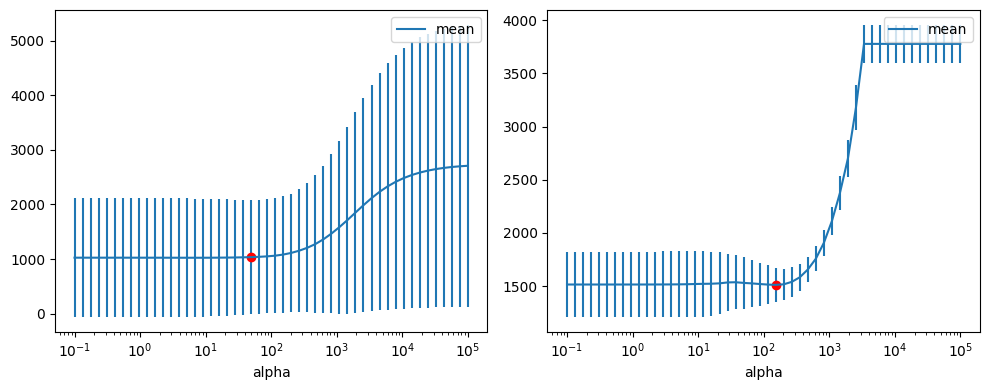

In [43]:
def plotRegularizationPath(ax, pipeline):
    model = pipeline['model']
    best_alpha = model.alpha_
    if isinstance(model, RidgeCV):
        df = pd.DataFrame({
            'alpha': model.alphas,
            'mean': np.sqrt(model.cv_results_).mean(axis=0),
            'std': np.sqrt(model.cv_results_).std(axis=0),
        })
    else:
        df = pd.DataFrame({
            'alpha': model.alphas_,
            'mean': np.sqrt(model.mse_path_).mean(axis=1),
            'std': np.sqrt(model.mse_path_).std(axis=1),
        })
    best_score = df['mean'][df['alpha'] == best_alpha]
    df.plot(x='alpha', y='mean', yerr='std', logx=True, ax=ax)
    ax.plot(model.alpha_, best_score, 'ro')

fig, axes = plt.subplots(ncols=2, figsize=(10, 4))
plotRegularizationPath(axes[0], ridge_cv)
plotRegularizationPath(axes[1], lasso_cv)
plt.tight_layout()
plt.show()

In [44]:
efs_model = LinearRegression()
efs_model.fit(train_X[efs_subset], train_y)

sfs_stepwise_model = LinearRegression()
sfs_stepwise_model.fit(train_X[stepwise_subset], train_y)

sfs_forward_model = LinearRegression()
sfs_forward_model.fit(train_X[forward_subset], train_y)

sfs_backward_model = LinearRegression()
sfs_backward_model.fit(train_X[backward_subset], train_y)

# Create tuned models for lasso and ridge
lasso_opt = Pipeline([
    ['normalize', StandardScaler()],
    ['model', Lasso(alpha=lasso_cv['model'].alpha_)],
])

ridge_opt = Pipeline([
    ['normalize', StandardScaler()],
    ['model', Ridge(alpha=ridge_cv['model'].alpha_)],
])


def metrics(model, train_X, train_y, holdout_X, holdout_y, *, subset=None):
    if subset is not None:
        train_X = train_X[subset]
        holdout_X = holdout_X[subset]
        n_features = len(train_X.columns)
        model.fit(train_X, train_y)
    else:
        model.fit(train_X, train_y)
        if isinstance(model, Pipeline):
            n_features = sum(model['model'].coef_ != 0)
        else:
            n_features = sum(model.coef_ != 0)
    scoring = {'neg_RMSE': 'neg_root_mean_squared_error',
               'neg_MAE': 'neg_mean_absolute_error'}
    np.random.seed(123)
    scores = cross_validate(model, train_X, train_y, cv=5, scoring=scoring)

    train_pred = model.predict(train_X)
    holdout_pred = model.predict(holdout_X)
    return {
        'CV_RMSE': - scores['test_neg_RMSE'].mean(),
        'CV_MAE': - scores['test_neg_MAE'].mean(),
        'train_RMSE': np.sqrt(np.mean((train_y - train_pred)**2)),
        'train_MAE': np.mean(np.abs(train_y - train_pred)),
        'holdout_RMSE': np.sqrt(np.mean((holdout_y - holdout_pred)**2)),
        'holdout_MAE': np.mean(np.abs(holdout_y - holdout_pred)),
        'n_features': n_features,
    }
pd.DataFrame({
    'Full': metrics(car_lm, train_X, train_y, holdout_X, holdout_y),
    'Exhaustive': metrics(efs_model, train_X, train_y, holdout_X, holdout_y, subset=efs_subset),
    'Forward': metrics(sfs_forward_model, train_X, train_y, holdout_X, holdout_y, subset=forward_subset),
    'Backward': metrics(sfs_backward_model, train_X, train_y, holdout_X, holdout_y, subset=backward_subset),
    'Stepwise': metrics(sfs_stepwise_model, train_X, train_y, holdout_X, holdout_y, subset=stepwise_subset),
    'Ridge': metrics(ridge_opt, train_X, train_y, holdout_X, holdout_y),
    'Lasso': metrics(lasso_opt, train_X, train_y, holdout_X, holdout_y),
}).transpose().round(0)

,CV_RMSE,CV_MAE,train_RMSE,train_MAE,holdout_RMSE,holdout_MAE,n_features
Full,1515.0,1053.0,1340.0,988.0,1355.0,1028.0,11.0
Exhaustive,1479.0,1068.0,1432.0,1035.0,1366.0,1027.0,5.0
Forward,1479.0,1068.0,1432.0,1035.0,1366.0,1027.0,5.0
Backward,1482.0,1124.0,1426.0,1081.0,1493.0,1133.0,9.0
Stepwise,1479.0,1068.0,1432.0,1035.0,1366.0,1027.0,5.0
Ridge,1487.0,1056.0,1375.0,1007.0,1348.0,1024.0,11.0
Lasso,1514.0,1080.0,1443.0,1039.0,1395.0,1052.0,5.0


In [45]:
# run a linear regression of Price on the remaining 11 predictors in the training set
train_df = train_X.join(train_y)

predictors = train_X.columns
formula = 'Price ~ ' + ' + '.join(predictors)

car_lm = sm.ols(formula=formula, data=train_df).fit()
car_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     371.6
Date:                Sat, 23 Nov 2024   Prob (F-statistic):          2.58e-256
Time:                        11:13:13   Log-Likelihood:                -5171.7
No. Observations:                 600   AIC:                         1.037e+04
Df Residuals:                     588   BIC:                         1.042e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1956.3598   1939.385     -1.009      0.314   -5765.325    1852.606
Fuel_Type_Diesel[T.True]  3875.7780    770.158      5.032      0.000    2363.182    5388.374
Fuel_Type_Petrol[T.True]  2897.5325    547.021      5.297      0.000    1823.180    3971.885
Age_08_04                 -130.7928      4.813    -27.173      0.000    -140.246    -121.339
KM                          -0.0183      0.002     -8.052      0.000      -0.023      -0.014
HP                          64.8345      8.247      7.862      0.000      48.637      81.032
Met_Color                   54.2823    120.096      0.452      0.651    -181.587     290.152
Automatic                  298.0097    276.402      1.078      0.281    -244.847     840.866
CC                          -4.2514      0.842     -5.048      0.000      -5.905      -2.597
Doors                      -25.8889     63.634     -0.407      0.684    -150.867      99.089
Quarterly_Tax               18.0132      2.670      6.748      0.000      12.770      23.256
Weight                      15.5473      1.766      8.803      0.000      12.078      19.016
==============================================================================
Omnibus:                       97.514   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              778.538
Skew:                          -0.440   Prob(JB):                    8.76e-170
Kurtosis:                       8.511   Cond. No.                     2.53e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.53e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""